# K Nearest Neighbors

# classify hidden data to classes

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object') 

             precision    recall  f1-score   support

          0       0.95      0.90      0.93       165
          1       0.89      0.94      0.91       135

avg / total       0.92      0.92      0.92       300
 

[[149  16]
 [  8 127]] 



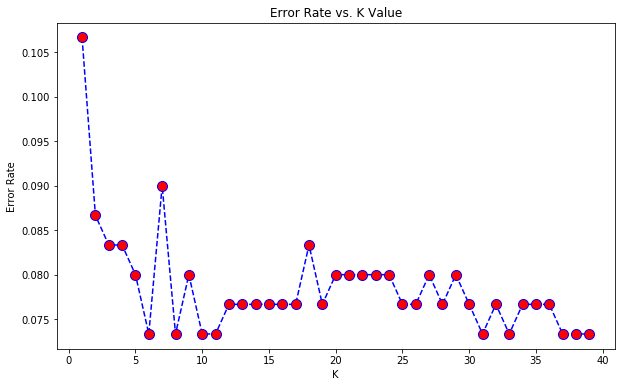

In [3]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#data
df = pd.read_csv("../Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/Classified Data",index_col=0)
print(df.columns, '\n')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

#choosing n_neighbors
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')  

#model
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

#evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred), '\n')
print(confusion_matrix(y_test,pred), '\n')